In [182]:
import numpy as np
import pandas as pd
import statsmodels.api as sts
from sklearn.linear_model import LinearRegression
import seaborn as sbs
import matplotlib.pyplot as plt

In [183]:
data = pd.read_csv('Cars_data.csv')

In [185]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


 #### Dropping Model from the dataframe as 312 unique models are hard to accomodate

In [153]:
data = data.drop('Model', axis=1)

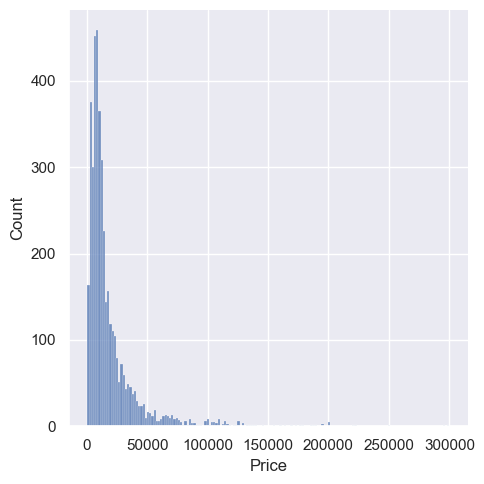

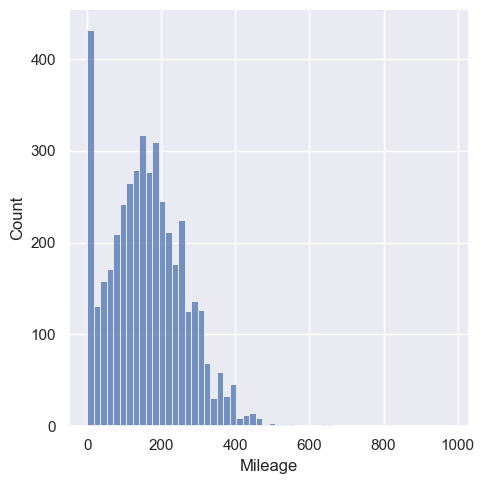

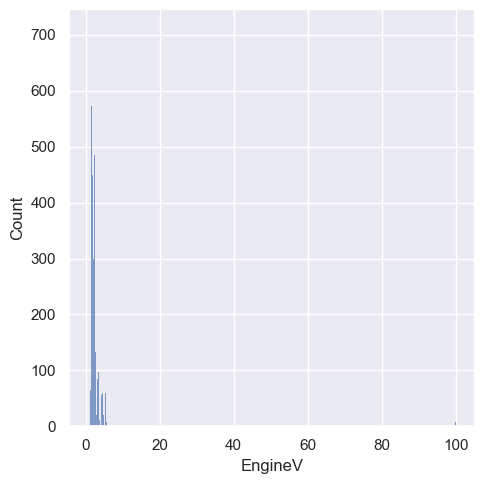

In [154]:
sns.displot(data['Price'])
sns.displot(data['Mileage'])
sns.displot(data['EngineV'])

#### As plots show few outliers at extremes will lead to inaccurate results. To accomodate such we will consider values till 99th percentile

In [155]:
data = data[data['Price'] < data['Price'].quantile(0.99)]

In [156]:
data = data[data['Mileage'] < data['Mileage'].quantile(0.99)]
data = data[data['EngineV'] < 6.5]

In [181]:
data.describe()

,Mileage,EngineV,log_price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
count,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000
mean,161.390972,2.442731,9.392575,0.106095,0.160673,0.196123,0.077786,0.111196,0.128284,0.219842,0.203009,0.067585,0.095639,0.382300,0.095639,0.155828,0.463657,0.148687,0.026014,0.361642
std,96.136165,0.945343,0.893196,0.307999,0.367276,0.397114,0.267869,0.314415,0.334448,0.414192,0.402291,0.251064,0.294133,0.486011,0.294133,0.362738,0.498741,0.355825,0.159196,0.480537
min,0.000000,0.600000,6.396930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92.000000,1.800000,8.853665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,158.000000,2.200000,9.350102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,229.000000,3.000000,9.975808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,438.000000,6.300000,11.744037,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Removing all NaN values and Registration column as their contribution is minimal

In [186]:
data = data.dropna(axis=0)
data = data.drop('Registration', axis=1)

#### Final Details of the dataframe

In [188]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,2012.000000,NaN


In [189]:
# plt.plot(data['Brand'],data['Price'])
# plt.plot(data['Body'],data['Price'])
# plt.plot(data['Mileage'], data['Price'])
# plt.plot(data['EngineV'], data['Price'])
# plt.plot(data['Engine Type'], data['Price'])

#### Above plots show no homoscedasticity

In [190]:
# plt.plot(data['Brand'],np.log(data['Price']))
# plt.plot(data['Body'],np.log(data['Price']))
# plt.plot(data['Mileage'], np.log(data['Price']))
# plt.plot(data['EngineV'], np.log(data['Price']))
# plt.plot(data['Engine Type'], np.log(data['Price']))

#### Above plots are homoscendastic, hence instead of using price as target, aim for log(price)


In [191]:
log_price = np.log(data['Price'])

In [192]:
data['log_price'] = log_price
data = data.drop('Price', axis=1)

#### Check for collinearity using VIF(Variance Inflation Factor)

In [193]:
data.describe()

,Mileage,EngineV,Year,log_price
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,163.572174,2.764586,2006.379627,9.409665
std,103.394703,4.935941,6.695595,0.933136
min,0.000000,0.600000,1969.000000,6.396930
25%,90.000000,1.800000,2003.000000,8.853523
50%,158.000000,2.200000,2007.000000,9.350102
75%,230.000000,3.000000,2012.000000,9.994242
max,980.000000,99.990000,2016.000000,12.611538


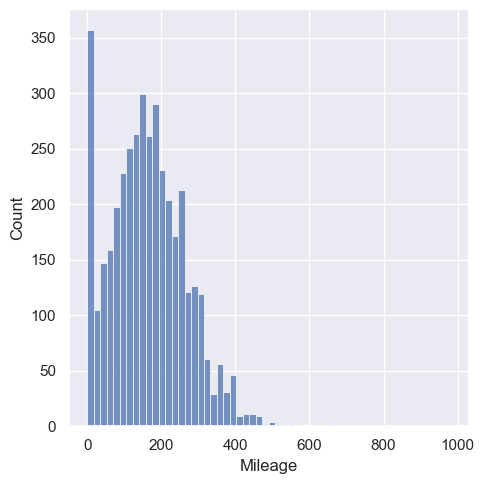

In [194]:
sns.displot(data['Mileage'])

In [195]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var = data[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['Vif'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,Vif,Features
0,3.906185,Mileage
1,10.813190,Year
2,8.260717,EngineV


#### VIF > 10 may increase inaccuracy, hence we drop the year column

In [196]:
data = data.drop('Year', axis=1)
data

,Brand,Body,Mileage,EngineV,Engine Type,Model,log_price
0,BMW,sedan,277,2.0,Petrol,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,Rav 4,9.814656
...,...,...,...,...,...,...,...
4339,Toyota,sedan,35,1.6,Petrol,Corolla,9.792556
4340,Mercedes-Benz,sedan,9,3.0,Diesel,S 350,11.736069
4341,BMW,sedan,1,3.5,Petrol,535,8.779557
4342,BMW,sedan,194,2.0,Petrol,520,8.987197


#### Creating dummy variables

In [197]:
data = pd.get_dummies(data)
data

,Mileage,EngineV,log_price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.9,8.974618,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.0,9.495519,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.2,10.043249,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.0,9.814656,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,35,1.6,9.792556,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4340,9,3.0,11.736069,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4341,1,3.5,8.779557,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4342,194,2.0,8.987197,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Creating regression model

In [198]:
x = data.drop('log_price',axis=1)
x

,Mileage,EngineV,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_crossover,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.2,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,120,2.0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,35,1.6,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4340,9,3.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4341,1,3.5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4342,194,2.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
y = data['log_price']
y

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
4339     9.792556
4340    11.736069
4341     8.779557
4342     8.987197
4344     9.510445
Name: log_price, Length: 4025, dtype: float64

In [200]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_std = scaler.fit(x)
x_std = scaler.transform(x)
x_std

array([[ 1.09717342, -0.15492109, -0.34132807, ..., -0.05907962,
        -0.01576417, -0.03526728],
       [ 2.54810497,  0.02743762, -0.34132807, ..., -0.05907962,
        -0.01576417, -0.03526728],
       [ 1.88067646,  0.45294129, -0.34132807, ..., -0.05907962,
        -0.01576417, -0.03526728],
       ...,
       [-1.57254065,  0.1490101 , -0.34132807, ..., -0.05907962,
        -0.01576417, -0.03526728],
       [ 0.29432462, -0.15492109, -0.34132807, ..., -0.05907962,
        -0.01576417, -0.03526728],
       [-0.38277677, -0.15492109, -0.34132807, ..., -0.05907962,
        -0.01576417, -0.03526728]])

#### Splitting the given data into testing and training sets

In [249]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state=365)

In [244]:
len(y_train)-len(y_test)

3219

#### Fitting linear regression model

In [245]:
reg.fit(x_train, y_train)

LinearRegression()

In [246]:
reg.score(x_train, y_train)

0.7440764283059863

#### Testing the model using test sets

In [250]:
y_pred = reg.predict(x_train)
y_pred

array([9.55329132, 9.46906281, 9.97687531, ..., 9.14093781, 8.72882843,
       8.39484406])

(6.0, 13.0)

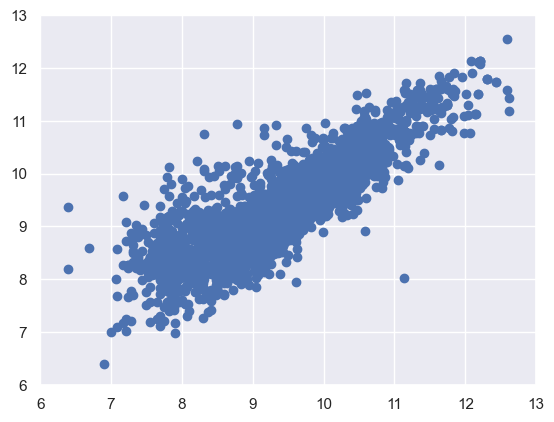

In [251]:
plt.scatter(y_train, y_pred)
plt.xlim(6,13)
plt.ylim(6,13)

#### Checking for normality

In [255]:
y_err = y_train - y_pred

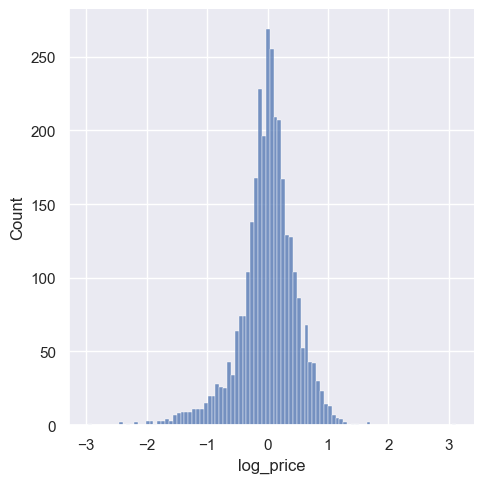

In [257]:
sns.displot(y_err)